In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import torch
import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold
from matplotlib import pyplot as plt

import paradime.dr
import paradime.relations
import paradime.transforms
import paradime.loss

In [3]:
diabetes = sklearn.datasets.load_diabetes()
data = diabetes['data']

In [4]:
pca = sklearn.decomposition.PCA()
pca.fit(data)

PCA()

In [5]:
pd_pca = paradime.dr.ParametricDR(
    model=torch.nn.Linear(10,10,bias=False),
    verbose=True,
)
pd_pca.register_dataset({
    'data': data,
    'pca': pca.transform(data),
})
pd_pca.add_training_phase(
    epochs=20,
    batch_size=50,
    loss=paradime.loss.PositionLoss(
        position_key='pca',
        embedding_method='forward',
    ),
    report_interval=2,
)
pd_pca.train()

2022-08-26 16:04:18,355: Registering dataset.
2022-08-26 16:04:18,356: Beginning training phase 'None'.
2022-08-26 16:04:18,365: Loss after epoch 0: 0.022928181919269264
2022-08-26 16:04:18,379: Loss after epoch 2: 0.008347461116500199
2022-08-26 16:04:18,392: Loss after epoch 4: 0.003057146357605234
2022-08-26 16:04:18,405: Loss after epoch 6: 0.0013236483573564328
2022-08-26 16:04:18,423: Loss after epoch 8: 0.0006021109256835189
2022-08-26 16:04:18,438: Loss after epoch 10: 0.0002844303544407012
2022-08-26 16:04:18,453: Loss after epoch 12: 0.0001489514597778907
2022-08-26 16:04:18,468: Loss after epoch 14: 8.644412127978285e-05
2022-08-26 16:04:18,482: Loss after epoch 16: 5.7492864470987115e-05
2022-08-26 16:04:18,497: Loss after epoch 18: 4.2509790318945306e-05


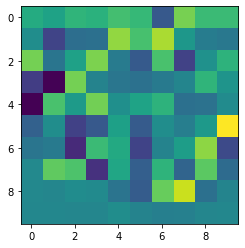

In [6]:
plt.imshow(pd_pca.model.weight.detach().numpy())

In [7]:
pd_mds = paradime.dr.ParametricDR(
    model=torch.nn.Linear(10,10,bias=False),
    global_relations=paradime.relations.PDist(),
    batch_relations=paradime.relations.DifferentiablePDist(
        transform=paradime.transforms.ToSquareTensor()
    ),
    verbose=True,
)
pd_mds.register_dataset({
    'data': torch.tensor(data).float(),
    'pca': torch.tensor(pca.transform(data)).float(),
})
pd_mds.add_training_phase(
    epochs=20,
    batch_size=50,
    loss=paradime.loss.PositionLoss(
        position_key='pca',
        embedding_method='forward',
    ),
    report_interval=2,
)
pd_mds.train()

2022-08-26 16:04:41,279: Registering dataset.
2022-08-26 16:04:41,280: Computing global relations 'rel'.
2022-08-26 16:04:41,280: Calculating pairwise distances.
2022-08-26 16:04:41,294: Beginning training phase 'None'.
2022-08-26 16:04:41,300: Loss after epoch 0: 0.02388608339242637
2022-08-26 16:04:41,314: Loss after epoch 2: 0.009400669252499938
2022-08-26 16:04:41,330: Loss after epoch 4: 0.0038423446530941874
2022-08-26 16:04:41,347: Loss after epoch 6: 0.0016425361682195216
2022-08-26 16:04:41,362: Loss after epoch 8: 0.0007013612921582535
2022-08-26 16:04:41,377: Loss after epoch 10: 0.0003345152690599207
2022-08-26 16:04:41,391: Loss after epoch 12: 0.0001825347644626163
2022-08-26 16:04:41,405: Loss after epoch 14: 0.00011693445230775978
2022-08-26 16:04:41,419: Loss after epoch 16: 8.34915822451876e-05
2022-08-26 16:04:41,434: Loss after epoch 18: 6.33838549219945e-05


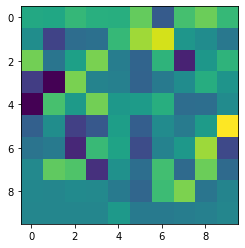

In [8]:
plt.imshow(pd_mds.model.weight.detach().numpy())

Text(0.5, 1.0, 'MDS Loss')

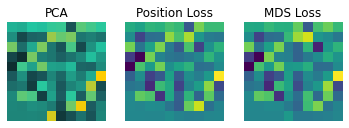

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(pca.components_, cmap=cmap)
ax1.set_axis_off()
ax1.set_title("PCA")
ax2.imshow(pd_pca.model.weight.detach().numpy())
ax2.set_axis_off()
ax2.set_title("Position Loss")
ax3.imshow(pd_mds.model.weight.detach().numpy())
ax3.set_axis_off()
ax3.set_title("MDS Loss")

In [29]:
import matplotlib.colors

In [59]:
colors = [ paradime.utils.plotting.get_color_palette()[k] for k in ['petrol', 'aqua', 'yellow'] ]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("paradime", colors)

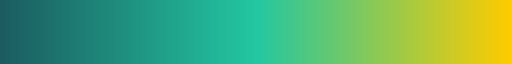

In [60]:
cmap

In [53]:
matplotlib.colors.colo

<Figure size 432x288 with 0 Axes>

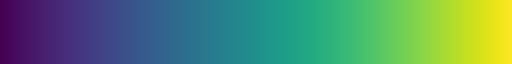

In [56]:
plt.cm.viridis

In [57]:
palette = paradime.utils.plotting.get_color_palette()

In [58]:
matplotlib.colors.rgb2lhc([ plt.cm.viridis(i) for i in np.arange(0.,1.,0.005) ]

[(0.267004, 0.004874, 0.329415, 1.0),
 (0.26851, 0.009605, 0.335427, 1.0),
 (0.269944, 0.014625, 0.341379, 1.0),
 (0.271305, 0.019942, 0.347269, 1.0),
 (0.273809, 0.031497, 0.358853, 1.0),
 (0.274952, 0.037752, 0.364543, 1.0),
 (0.276022, 0.044167, 0.370164, 1.0),
 (0.277018, 0.050344, 0.375715, 1.0),
 (0.278791, 0.062145, 0.386592, 1.0),
 (0.279566, 0.067836, 0.391917, 1.0),
 (0.280267, 0.073417, 0.397163, 1.0),
 (0.281446, 0.08432, 0.407414, 1.0),
 (0.281924, 0.089666, 0.412415, 1.0),
 (0.282327, 0.094955, 0.417331, 1.0),
 (0.282656, 0.100196, 0.42216, 1.0),
 (0.283091, 0.110553, 0.431554, 1.0),
 (0.283197, 0.11568, 0.436115, 1.0),
 (0.283229, 0.120777, 0.440584, 1.0),
 (0.283072, 0.130895, 0.449241, 1.0),
 (0.282884, 0.13592, 0.453427, 1.0),
 (0.282623, 0.140926, 0.457517, 1.0),
 (0.28229, 0.145912, 0.46151, 1.0),
 (0.281412, 0.155834, 0.469201, 1.0),
 (0.280868, 0.160771, 0.472899, 1.0),
 (0.280255, 0.165693, 0.476498, 1.0),
 (0.278826, 0.17549, 0.483397, 1.0),
 (0.278012, 0.180367